<a href="https://colab.research.google.com/github/brahim12-hgt/-Pr-diction-des-Prix-Immobiliers-au-Maroc/blob/main/house_price_prediction_pipeline2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Pipeline de Machine Learning - Prédiction des Prix Immobiliers

##  Objectif
Créer un modèle de régression pour prédire le prix d'un bien immobilier à partir de ses caractéristiques.

**Variables:**
- Type du bien (Appartements, Villas, etc.)
- Localisation
- Surface (m²)
- Nombre de pièces
- Nombre de chambres
- Nombre de salles de bain
- Étage

## 📦 1. Import des bibliothèques

In [ ]:
# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing et Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modèles de régression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Métriques
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuration
import warnings
warnings.filterwarnings('ignore')

# Style des graphiques
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Bibliothèques importées avec succès")

✅ Bibliothèques importées avec succès


## 📊 2. Chargement et exploration des données

In [ ]:
# Charger le dataset
df = pd.read_csv('/content/house_dataset_filtered.csv')

print("📈 Dimensions du dataset:", df.shape)
print("\n" + "="*60)
df.head(10)

📈 Dimensions du dataset: (1563, 8)



,Type,Localisation,Price,surface,rooms,bedrooms,bathrooms,floor
0,Appartements,Anfa,1230000,86.0,3.0,2.0,2.0,3
1,Appartements,La Gironde,900000,86.0,3.0,2.0,1.0,5
2,Appartements,Bourgogne Ouest,2400000,180.0,5.0,3.0,3.0,3
3,Appartements,Les princesses,1550000,120.0,5.0,3.0,2.0,5
4,Appartements,Bourgogne Ouest,1450000,113.0,4.0,3.0,2.0,3
5,Appartements,Triangle d'Or,4800000,245.0,4.0,3.0,3.0,3
6,Appartements,Maârif Extension,1700000,110.0,3.0,2.0,2.0,3
7,Appartements,Anassi,330000,50.0,3.0,2.0,1.0,3
8,Villas,Californie,7500000,400.0,8.0,5.0,4.0,0
9,Appartements,Triangle d'Or,3600000,144.0,5.0,3.0,3.0,3


In [ ]:
# Informations générales
print("📋 Informations sur le dataset:")
print("="*60)
df.info()

print("\n" + "="*60)
print("📊 Statistiques descriptives:")
print("="*60)
df.describe()

📋 Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          1563 non-null   object 
 1   Localisation  1563 non-null   object 
 2   Price         1563 non-null   int64  
 3   surface       1563 non-null   float64
 4   rooms         1563 non-null   float64
 5   bedrooms      1563 non-null   float64
 6   bathrooms     1563 non-null   float64
 7   floor         1563 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 97.8+ KB

📊 Statistiques descriptives:


,Price,surface,rooms,bedrooms,bathrooms,floor
count,1.563000e+03,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000
mean,4.356385e+06,275.470250,4.600768,2.922585,2.308260,2.622521
std,6.656313e+06,419.034306,2.187275,1.300456,1.119955,1.916183
min,2.400000e+05,32.000000,1.000000,1.000000,1.000000,0.000000
25%,1.240000e+06,91.000000,3.000000,2.000000,2.000000,2.000000
50%,2.150000e+06,131.000000,4.000000,3.000000,2.000000,3.000000
75%,4.300000e+06,250.000000,6.000000,4.000000,3.000000,3.000000
max,7.140000e+07,5400.000000,17.000000,18.000000,10.000000,20.000000


In [ ]:
# Vérifier les valeurs manquantes
print("🔍 Valeurs manquantes par colonne:")
print("="*60)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Manquantes': missing,
    'Pourcentage': missing_pct
})
print(missing_df[missing_df['Manquantes'] > 0])

if missing.sum() == 0:
    print("✅ Aucune valeur manquante détectée")

🔍 Valeurs manquantes par colonne:
Empty DataFrame
Columns: [Manquantes, Pourcentage]
Index: []
✅ Aucune valeur manquante détectée


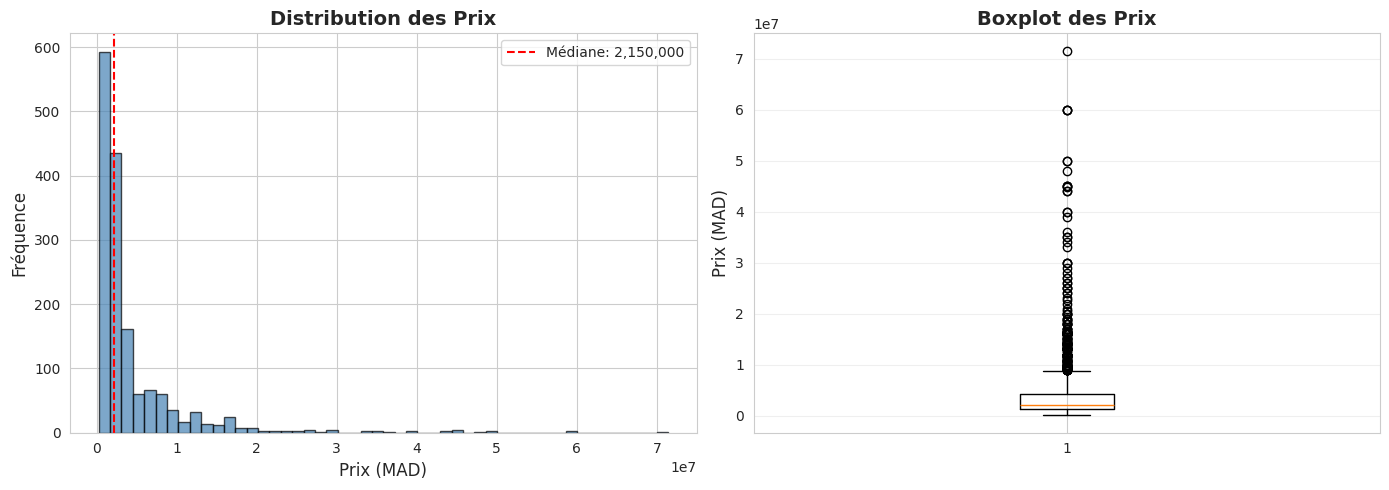

📊 Prix moyen: 4,356,384.98 MAD
📊 Prix médian: 2,150,000.00 MAD
📊 Prix min: 240,000.00 MAD
📊 Prix max: 71,400,000.00 MAD


In [ ]:
# Distribution de la variable cible (Prix)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme
axes[0].hist(df['Price'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Prix (MAD)', fontsize=12)
axes[0].set_ylabel('Fréquence', fontsize=12)
axes[0].set_title('Distribution des Prix', fontsize=14, fontweight='bold')
axes[0].axvline(df['Price'].median(), color='red', linestyle='--', label=f'Médiane: {df["Price"].median():,.0f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(df['Price'], vert=True)
axes[1].set_ylabel('Prix (MAD)', fontsize=12)
axes[1].set_title('Boxplot des Prix', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Prix moyen: {df['Price'].mean():,.2f} MAD")
print(f"📊 Prix médian: {df['Price'].median():,.2f} MAD")
print(f"📊 Prix min: {df['Price'].min():,.2f} MAD")
print(f"📊 Prix max: {df['Price'].max():,.2f} MAD")

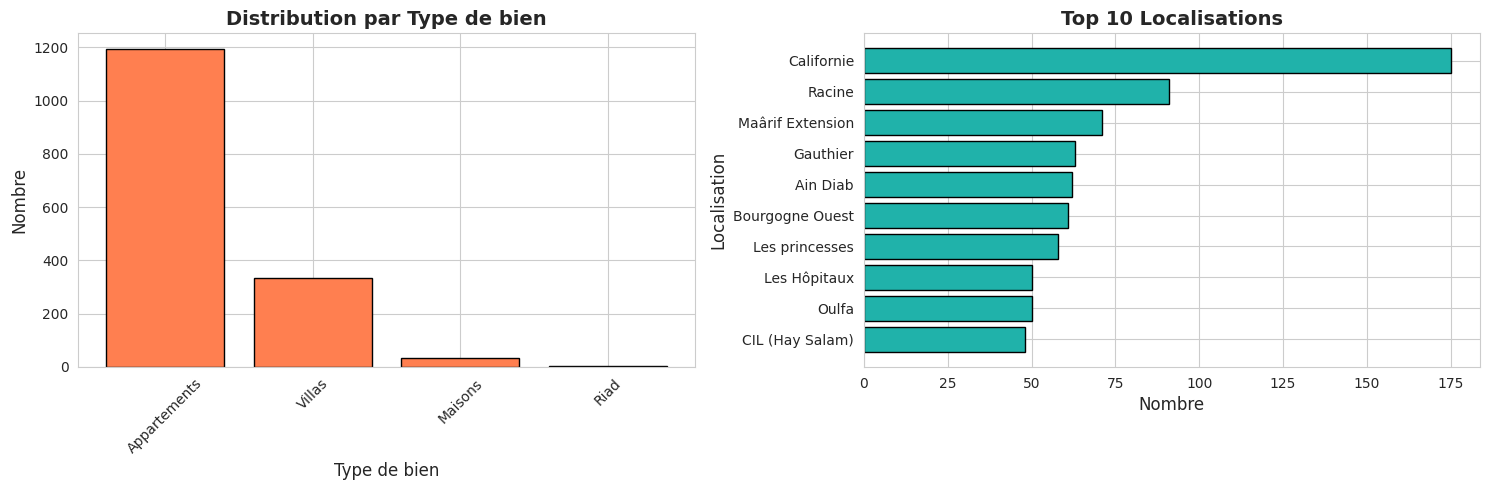

In [ ]:
# Analyse des variables catégorielles
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Type de bien
type_counts = df['Type'].value_counts()
axes[0].bar(type_counts.index, type_counts.values, color='coral', edgecolor='black')
axes[0].set_xlabel('Type de bien', fontsize=12)
axes[0].set_ylabel('Nombre', fontsize=12)
axes[0].set_title('Distribution par Type de bien', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Top 10 localisations
top_locations = df['Localisation'].value_counts().head(10)
axes[1].barh(top_locations.index, top_locations.values, color='lightseagreen', edgecolor='black')
axes[1].set_xlabel('Nombre', fontsize=12)
axes[1].set_ylabel('Localisation', fontsize=12)
axes[1].set_title('Top 10 Localisations', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

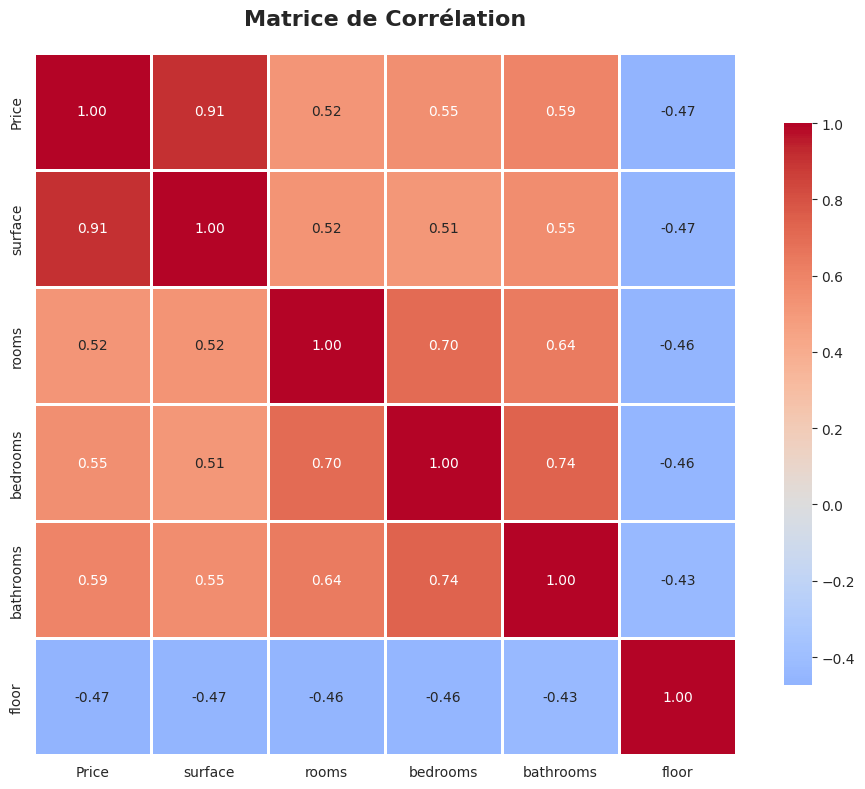


🔗 Corrélations avec le Prix:
Price        1.000000
surface      0.912229
bathrooms    0.591563
bedrooms     0.548855
rooms        0.520825
floor       -0.473436
Name: Price, dtype: float64


In [ ]:
# Corrélation entre les variables numériques
numeric_cols = ['Price', 'surface', 'rooms', 'bedrooms', 'bathrooms', 'floor']
correlation = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n🔗 Corrélations avec le Prix:")
print("="*60)
print(correlation['Price'].sort_values(ascending=False))

## 🔧 3. Préparation des données

In [ ]:
# Séparation des features et de la cible
X = df.drop('Price', axis=1)
y = df['Price']

print("✅ Features (X):")
print(X.columns.tolist())
print(f"\n✅ Forme de X: {X.shape}")
print(f"✅ Forme de y: {y.shape}")

✅ Features (X):
['Type', 'Localisation', 'surface', 'rooms', 'bedrooms', 'bathrooms', 'floor']

✅ Forme de X: (1563, 7)
✅ Forme de y: (1563,)


In [ ]:
# Split train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("📊 Taille des ensembles:")
print("="*60)
print(f"Training set: {X_train.shape[0]} échantillons ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} échantillons ({X_test.shape[0]/len(X)*100:.1f}%)")

📊 Taille des ensembles:
Training set: 1250 échantillons (80.0%)
Test set: 313 échantillons (20.0%)


In [ ]:
# Identifier les colonnes numériques et catégorielles
numeric_features = ['surface', 'rooms', 'bedrooms', 'bathrooms', 'floor']
categorical_features = ['Type', 'Localisation']

print("🔢 Features numériques:", numeric_features)
print("🏷️  Features catégorielles:", categorical_features)

🔢 Features numériques: ['surface', 'rooms', 'bedrooms', 'bathrooms', 'floor']
🏷️  Features catégorielles: ['Type', 'Localisation']


## 🏗️ 4. Construction du Pipeline de Preprocessing

In [ ]:
# Pipeline de preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

print("✅ Pipeline de preprocessing créé")
print("\n🔄 Transformations:")
print("  - Numériques: StandardScaler (normalisation)")
print("  - Catégorielles: OneHotEncoder (encodage)")

✅ Pipeline de preprocessing créé

🔄 Transformations:
  - Numériques: StandardScaler (normalisation)
  - Catégorielles: OneHotEncoder (encodage)


## 🤖 5. Entraînement et Comparaison de Modèles

In [ ]:
# Dictionnaire de modèles à tester
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

print(f"🤖 Modèles à tester: {len(models)}")
for name in models.keys():
    print(f"  ✓ {name}")

🤖 Modèles à tester: 6
  ✓ Linear Regression
  ✓ Ridge
  ✓ Lasso
  ✓ Decision Tree
  ✓ Random Forest
  ✓ Gradient Boosting


In [ ]:
# Entraînement et évaluation de tous les modèles
results = []

print("🏋️ Entraînement des modèles en cours...\n")
print("="*80)

for name, model in models.items():
    # Créer un pipeline complet
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Entraîner le modèle
    pipeline.fit(X_train, y_train)

    # Prédictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Métriques sur le train
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # Métriques sur le test
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Cross-validation score (5-fold)
    cv_scores = cross_val_score(pipeline, X_train, y_train,
                                 cv=5, scoring='r2', n_jobs=-1)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Stocker les résultats
    results.append({
        'Modèle': name,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'CV R² (mean)': cv_mean,
        'CV R² (std)': cv_std,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Pipeline': pipeline
    })

    print(f"✅ {name}")
    print(f"   Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f} | CV R²: {cv_mean:.4f} (±{cv_std:.4f})")
    print(f"   Test MAE: {test_mae:,.0f} MAD | Test RMSE: {test_rmse:,.0f} MAD")
    print("-" * 80)

print("\n✅ Tous les modèles ont été entraînés avec succès!")

🏋️ Entraînement des modèles en cours...

✅ Linear Regression
   Train R²: 0.8849 | Test R²: 0.9378 | CV R²: 0.8534 (±0.0690)
   Test MAE: 905,468 MAD | Test RMSE: 1,428,884 MAD
--------------------------------------------------------------------------------
✅ Ridge
   Train R²: 0.8843 | Test R²: 0.9396 | CV R²: 0.8556 (±0.0700)
   Test MAE: 883,571 MAD | Test RMSE: 1,407,777 MAD
--------------------------------------------------------------------------------
✅ Lasso
   Train R²: 0.8849 | Test R²: 0.9377 | CV R²: 0.8534 (±0.0690)
   Test MAE: 906,039 MAD | Test RMSE: 1,429,146 MAD
--------------------------------------------------------------------------------
✅ Decision Tree
   Train R²: 1.0000 | Test R²: 0.6525 | CV R²: 0.8132 (±0.0750)
   Test MAE: 1,180,332 MAD | Test RMSE: 3,376,737 MAD
--------------------------------------------------------------------------------
✅ Random Forest
   Train R²: 0.9808 | Test R²: 0.8663 | CV R²: 0.8688 (±0.0849)
   Test MAE: 848,624 MAD | Test RMSE:

In [ ]:
# Tableau récapitulatif des performances
results_df = pd.DataFrame(results).drop('Pipeline', axis=1)
results_df = results_df.sort_values('Test R²', ascending=False)

print("📊 TABLEAU RÉCAPITULATIF DES PERFORMANCES")
print("="*80)
print(results_df.to_string(index=False))

# Meilleur modèle
best_model_name = results_df.iloc[0]['Modèle']
best_test_r2 = results_df.iloc[0]['Test R²']
print(f"\n🏆 MEILLEUR MODÈLE: {best_model_name} (Test R² = {best_test_r2:.4f})")

📊 TABLEAU RÉCAPITULATIF DES PERFORMANCES
           Modèle  Train R²  Test R²  CV R² (mean)  CV R² (std)    Train MAE     Test MAE   Train RMSE    Test RMSE
            Ridge  0.884334 0.939595      0.855622     0.069971 1.079555e+06 8.835712e+05 2.334724e+06 1.407777e+06
Linear Regression  0.884946 0.937770      0.853413     0.069003 1.073889e+06 9.054682e+05 2.328543e+06 1.428884e+06
            Lasso  0.884946 0.937747      0.853414     0.069000 1.073906e+06 9.060394e+05 2.328543e+06 1.429146e+06
Gradient Boosting  0.974332 0.868329      0.871617     0.070427 6.288669e+05 7.887369e+05 1.099837e+06 2.078461e+06
    Random Forest  0.980771 0.866279      0.868760     0.084879 3.477900e+05 8.486235e+05 9.519409e+05 2.094579e+06
    Decision Tree  0.999986 0.652464      0.813223     0.075048 2.969384e+03 1.180332e+06 2.536476e+04 3.376737e+06

🏆 MEILLEUR MODÈLE: Ridge (Test R² = 0.9396)


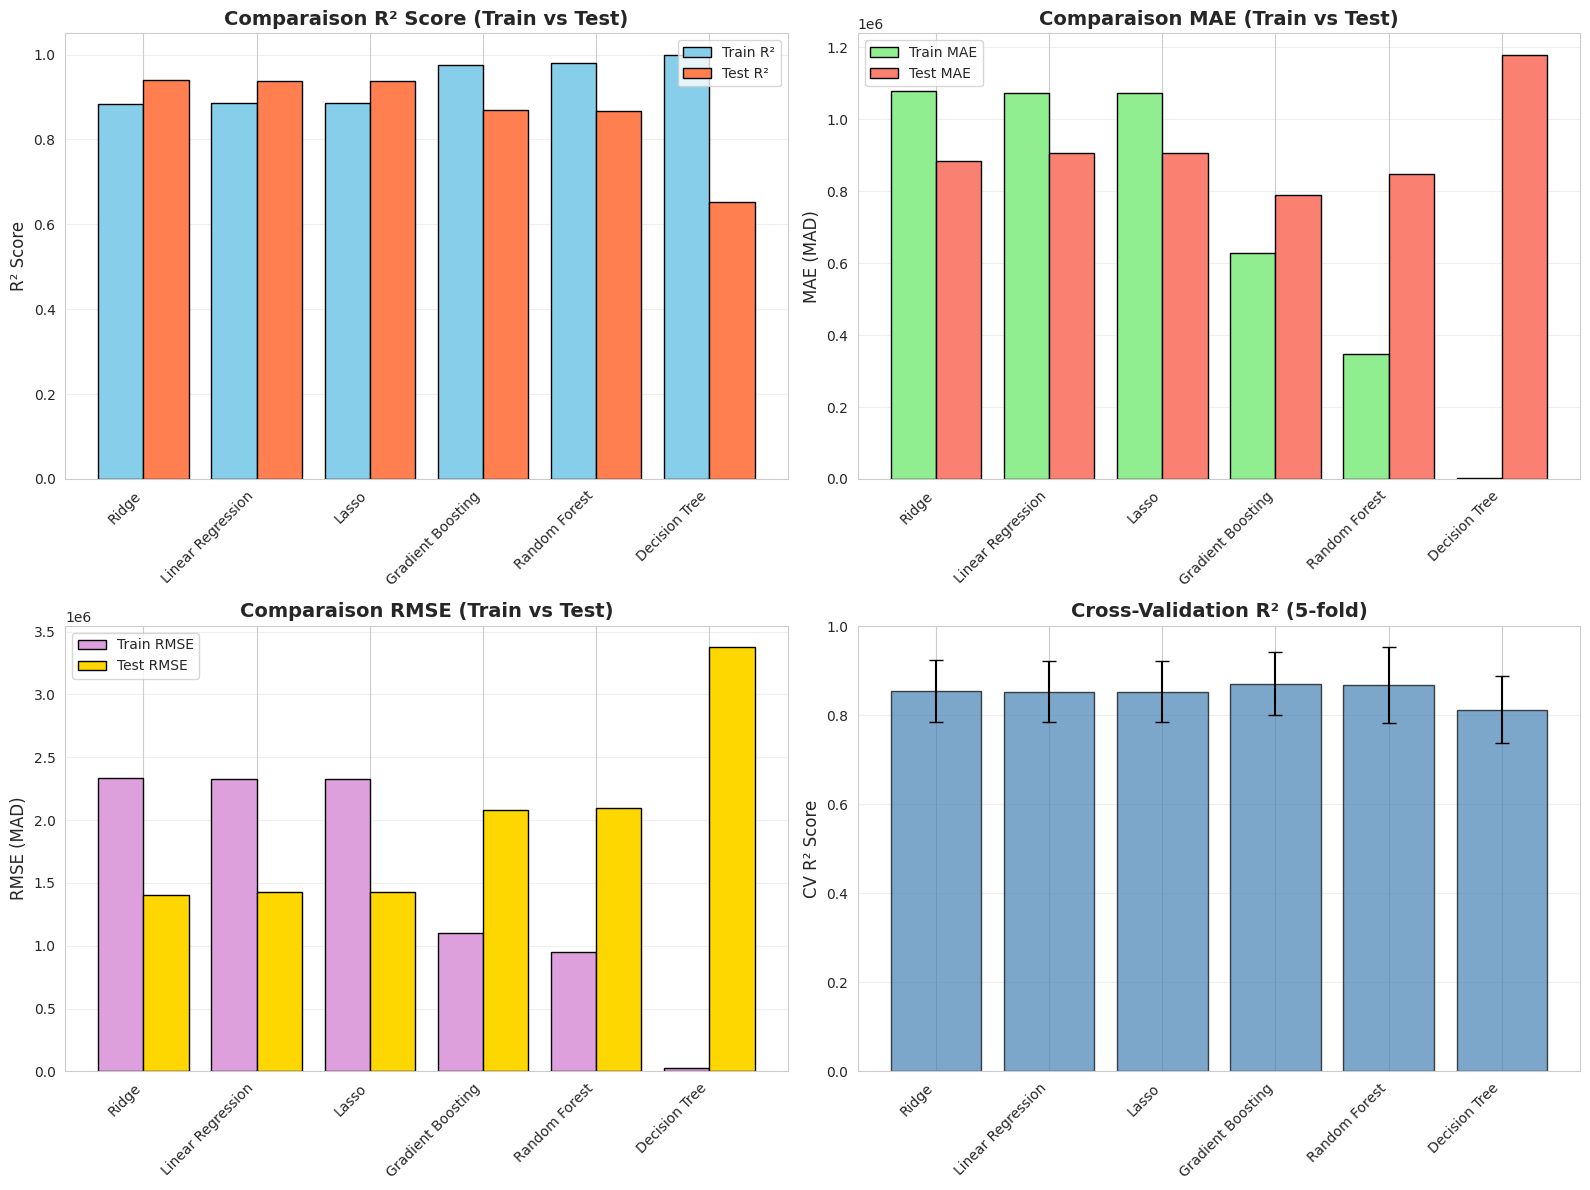

In [ ]:
# Visualisation comparative des performances
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# R² Score
ax1 = axes[0, 0]
x_pos = np.arange(len(results_df))
ax1.bar(x_pos - 0.2, results_df['Train R²'], 0.4, label='Train R²', color='skyblue', edgecolor='black')
ax1.bar(x_pos + 0.2, results_df['Test R²'], 0.4, label='Test R²', color='coral', edgecolor='black')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(results_df['Modèle'], rotation=45, ha='right')
ax1.set_ylabel('R² Score', fontsize=12)
ax1.set_title('Comparaison R² Score (Train vs Test)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# MAE
ax2 = axes[0, 1]
ax2.bar(x_pos - 0.2, results_df['Train MAE'], 0.4, label='Train MAE', color='lightgreen', edgecolor='black')
ax2.bar(x_pos + 0.2, results_df['Test MAE'], 0.4, label='Test MAE', color='salmon', edgecolor='black')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(results_df['Modèle'], rotation=45, ha='right')
ax2.set_ylabel('MAE (MAD)', fontsize=12)
ax2.set_title('Comparaison MAE (Train vs Test)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# RMSE
ax3 = axes[1, 0]
ax3.bar(x_pos - 0.2, results_df['Train RMSE'], 0.4, label='Train RMSE', color='plum', edgecolor='black')
ax3.bar(x_pos + 0.2, results_df['Test RMSE'], 0.4, label='Test RMSE', color='gold', edgecolor='black')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(results_df['Modèle'], rotation=45, ha='right')
ax3.set_ylabel('RMSE (MAD)', fontsize=12)
ax3.set_title('Comparaison RMSE (Train vs Test)', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Cross-Validation R²
ax4 = axes[1, 1]
ax4.bar(results_df['Modèle'], results_df['CV R² (mean)'],
        yerr=results_df['CV R² (std)'], capsize=5,
        color='steelblue', edgecolor='black', alpha=0.7)
ax4.set_xticklabels(results_df['Modèle'], rotation=45, ha='right')
ax4.set_ylabel('CV R² Score', fontsize=12)
ax4.set_title('Cross-Validation R² (5-fold)', fontsize=14, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 🎯 6. Analyse du Meilleur Modèle

In [ ]:
# Récupérer le meilleur modèle
best_pipeline = [r['Pipeline'] for r in results if r['Modèle'] == best_model_name][0]

# Prédictions du meilleur modèle
y_test_pred_best = best_pipeline.predict(X_test)

print(f"🏆 Analyse détaillée du meilleur modèle: {best_model_name}")
print("="*80)

🏆 Analyse détaillée du meilleur modèle: Ridge


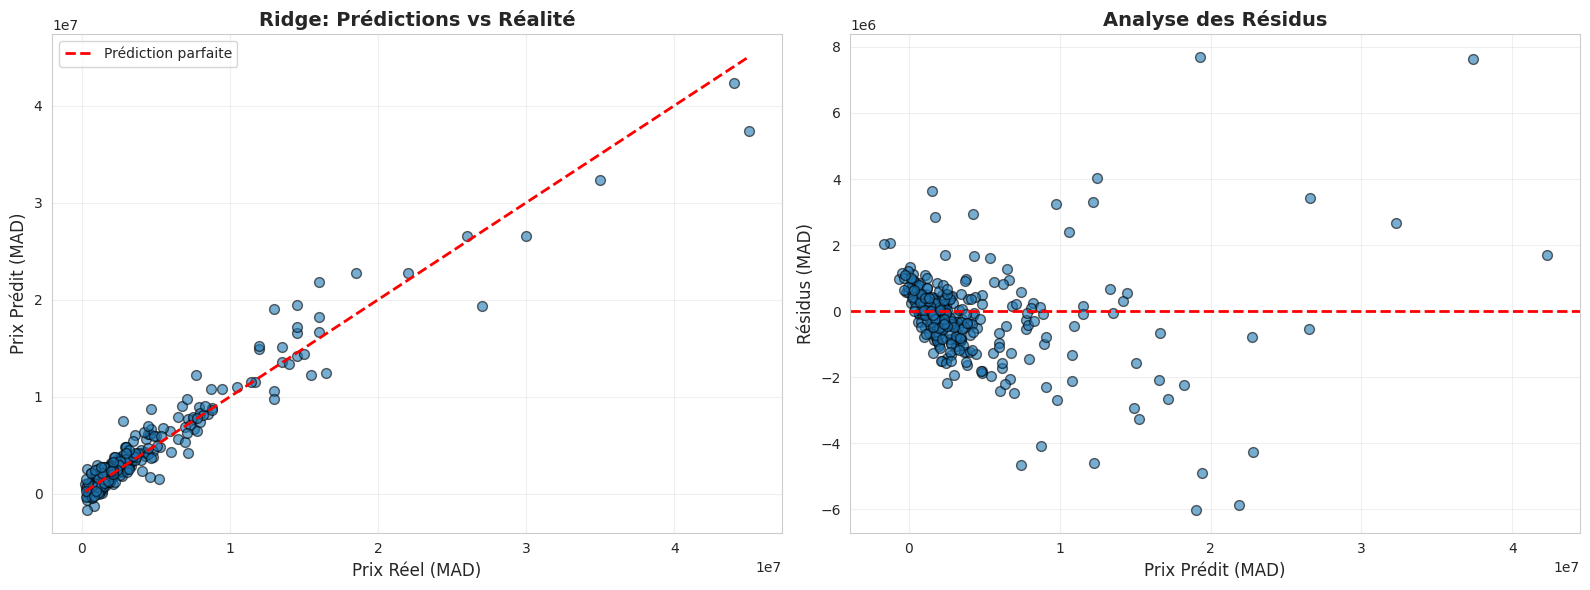

In [ ]:
# Graphique: Prédictions vs Valeurs Réelles
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
ax1 = axes[0]
ax1.scatter(y_test, y_test_pred_best, alpha=0.6, edgecolors='k', s=50)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Prédiction parfaite')
ax1.set_xlabel('Prix Réel (MAD)', fontsize=12)
ax1.set_ylabel('Prix Prédit (MAD)', fontsize=12)
ax1.set_title(f'{best_model_name}: Prédictions vs Réalité', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Résidus
residuals = y_test - y_test_pred_best
ax2 = axes[1]
ax2.scatter(y_test_pred_best, residuals, alpha=0.6, edgecolors='k', s=50)
ax2.axhline(y=0, color='r', linestyle='--', lw=2)
ax2.set_xlabel('Prix Prédit (MAD)', fontsize=12)
ax2.set_ylabel('Résidus (MAD)', fontsize=12)
ax2.set_title('Analyse des Résidus', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

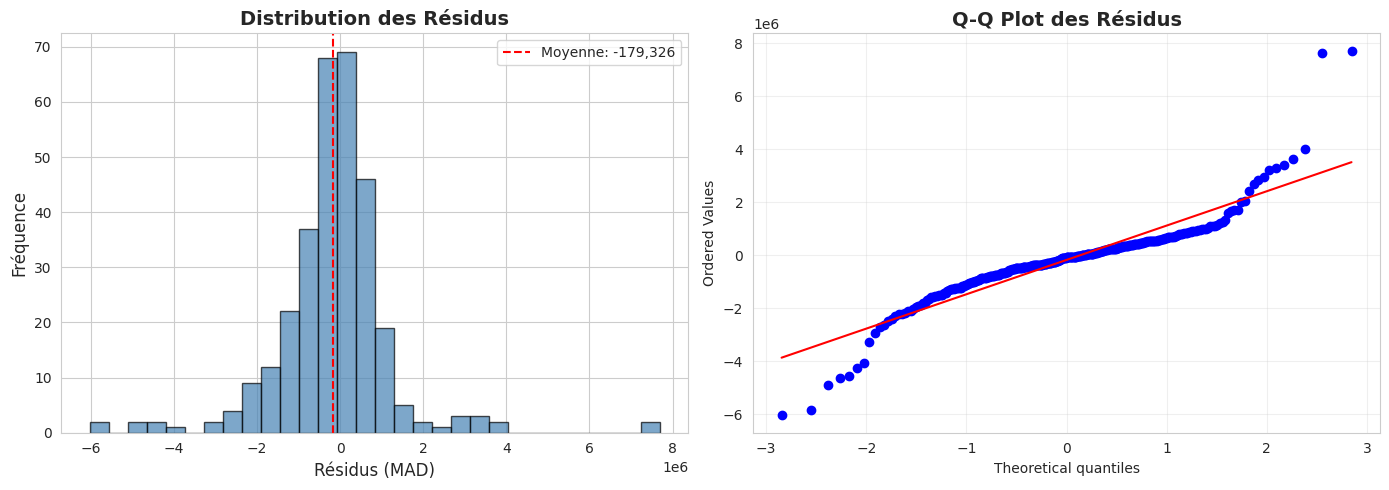

📊 Statistiques des résidus:
   Moyenne: -179,326.00 MAD
   Écart-type: 1,398,544.19 MAD
   Médiane: -87,204.51 MAD


In [ ]:
# Distribution des résidus
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme des résidus
axes[0].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(residuals.mean(), color='red', linestyle='--',
                label=f'Moyenne: {residuals.mean():,.0f}')
axes[0].set_xlabel('Résidus (MAD)', fontsize=12)
axes[0].set_ylabel('Fréquence', fontsize=12)
axes[0].set_title('Distribution des Résidus', fontsize=14, fontweight='bold')
axes[0].legend()

# Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot des Résidus', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Statistiques des résidus:")
print(f"   Moyenne: {residuals.mean():,.2f} MAD")
print(f"   Écart-type: {residuals.std():,.2f} MAD")
print(f"   Médiane: {residuals.median():,.2f} MAD")

In [ ]:
# Importance des features (si applicable)
if hasattr(best_pipeline.named_steps['regressor'], 'feature_importances_'):
    # Récupérer les noms des features après transformation
    feature_names = (numeric_features +
                    list(best_pipeline.named_steps['preprocessor']
                         .named_transformers_['cat']
                         .get_feature_names_out(categorical_features)))

    # Importance des features
    importances = best_pipeline.named_steps['regressor'].feature_importances_

    # Créer un DataFrame
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    # Top 15 features
    top_15 = feature_importance_df.head(15)

    plt.figure(figsize=(12, 8))
    plt.barh(top_15['Feature'], top_15['Importance'], color='teal', edgecolor='black')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title(f'{best_model_name}: Top 15 Features les Plus Importantes',
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("\n📊 Top 10 Features les Plus Importantes:")
    print("="*80)
    print(feature_importance_df.head(10).to_string(index=False))
else:
    print(f"⚠️ Le modèle {best_model_name} ne fournit pas d'importance des features")

⚠️ Le modèle Ridge ne fournit pas d'importance des features


## 🔍 7. Optimisation du Meilleur Modèle (Grid Search)

🔍 Optimisation des hyperparamètres pour Ridge Regression...

⏳ Entraînement en cours...
Fitting 5 folds for each of 165 candidates, totalling 825 fits

✅ Grid Search terminé!
Meilleurs paramètres: {'regressor__alpha': 1.0, 'regressor__max_iter': 1000, 'regressor__solver': 'sag'}
Meilleur score CV: 0.8556

📊 Performance du modèle Ridge optimisé:
Train R²: 0.8843
Test R²: 0.9397
Test MAE: 883,194 MAD
Test RMSE: 1,407,007 MAD

🔄 Comparaison Ridge de base vs Ridge optimisé:
R² avant optimisation: 0.9396
R² après optimisation: 0.9397
Amélioration: 0.01%

📊 Top 10 configurations:
 param_regressor__alpha param_regressor__solver  param_regressor__max_iter  mean_test_score  std_test_score
                    1.0                     sag                       1000         0.855647        0.069995
                    1.0                     sag                       2000         0.855647        0.069995
                    1.0                     sag                       5000         0.855647    

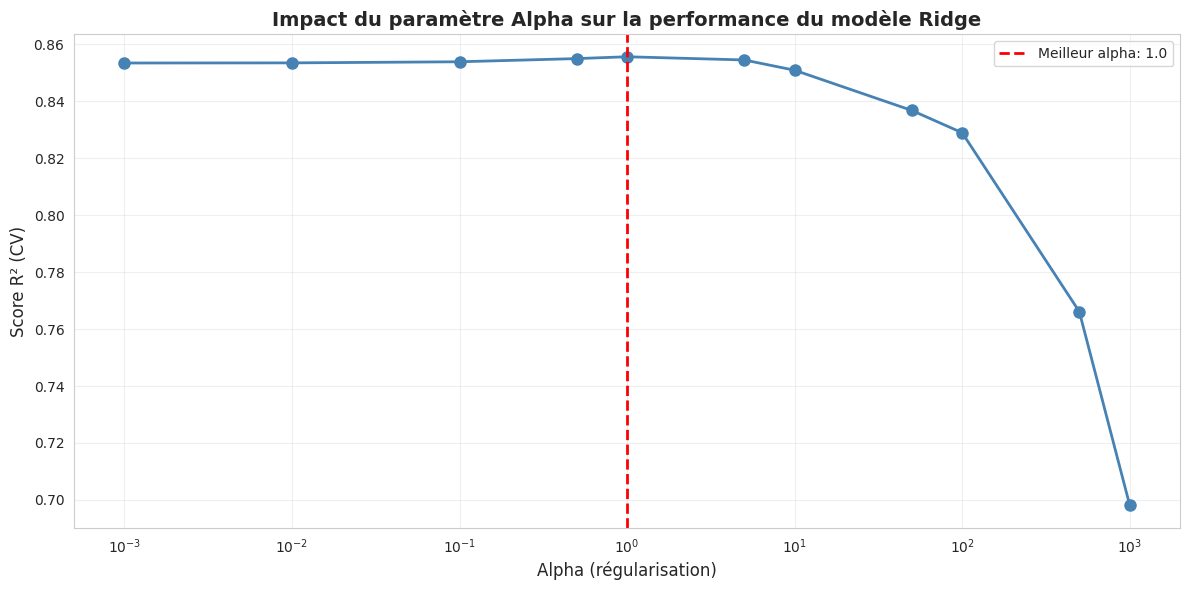


✅ Modèle Ridge optimisé prêt à l'emploi!


In [26]:
# Grid Search pour optimiser les hyperparamètres du modèle Ridge
print(f"🔍 Optimisation des hyperparamètres pour Ridge Regression...\n")

# Créer le pipeline Ridge
from sklearn.linear_model import Ridge

ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(random_state=42))
])

# Grille de paramètres pour Ridge
param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0],
    'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag'],
    'regressor__max_iter': [1000, 2000, 5000]
}

# Grid Search
grid_search = GridSearchCV(
    ridge_pipeline,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("⏳ Entraînement en cours...")
grid_search.fit(X_train, y_train)

print("\n✅ Grid Search terminé!")
print("="*80)
print(f"Meilleurs paramètres: {grid_search.best_params_}")
print(f"Meilleur score CV: {grid_search.best_score_:.4f}")

# Modèle optimisé
optimized_pipeline = grid_search.best_estimator_

# Évaluation du modèle optimisé
y_train_pred_opt = optimized_pipeline.predict(X_train)
y_test_pred_opt = optimized_pipeline.predict(X_test)

# Métriques
train_r2_opt = r2_score(y_train, y_train_pred_opt)
test_r2_opt = r2_score(y_test, y_test_pred_opt)
test_mae_opt = mean_absolute_error(y_test, y_test_pred_opt)
test_rmse_opt = np.sqrt(mean_squared_error(y_test, y_test_pred_opt))

print("\n📊 Performance du modèle Ridge optimisé:")
print("="*80)
print(f"Train R²: {train_r2_opt:.4f}")
print(f"Test R²: {test_r2_opt:.4f}")
print(f"Test MAE: {test_mae_opt:,.0f} MAD")
print(f"Test RMSE: {test_rmse_opt:,.0f} MAD")

# Performance du Ridge de base (pour comparaison)
ridge_base = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(random_state=42))
])
ridge_base.fit(X_train, y_train)
y_test_pred_base = ridge_base.predict(X_test)
base_r2 = r2_score(y_test, y_test_pred_base)

# Comparaison avant/après optimisation
print("\n🔄 Comparaison Ridge de base vs Ridge optimisé:")
print("="*80)
print(f"R² avant optimisation: {base_r2:.4f}")
print(f"R² après optimisation: {test_r2_opt:.4f}")
print(f"Amélioration: {(test_r2_opt - base_r2)*100:.2f}%")

# Visualisation des résultats du Grid Search
results_df = pd.DataFrame(grid_search.cv_results_)
top_10_results = results_df.nlargest(10, 'mean_test_score')[
    ['param_regressor__alpha', 'param_regressor__solver',
     'param_regressor__max_iter', 'mean_test_score', 'std_test_score']
]

print("\n📊 Top 10 configurations:")
print("="*80)
print(top_10_results.to_string(index=False))

# Graphique: Impact de alpha sur la performance
alpha_scores = results_df.groupby('param_regressor__alpha')['mean_test_score'].mean().sort_index()

plt.figure(figsize=(12, 6))
plt.semilogx(alpha_scores.index, alpha_scores.values, marker='o',
             linewidth=2, markersize=8, color='steelblue')
plt.axvline(grid_search.best_params_['regressor__alpha'],
            color='red', linestyle='--', linewidth=2,
            label=f"Meilleur alpha: {grid_search.best_params_['regressor__alpha']}")
plt.xlabel('Alpha (régularisation)', fontsize=12)
plt.ylabel('Score R² (CV)', fontsize=12)
plt.title('Impact du paramètre Alpha sur la performance du modèle Ridge',
          fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Mettre à jour le meilleur pipeline
best_pipeline = optimized_pipeline
best_model_name = 'Ridge (Optimized)'

print("\n✅ Modèle Ridge optimisé prêt à l'emploi!")

## 💾 8. Sauvegarde du Modèle Final

In [27]:
import joblib

# Sauvegarder le modèle Ridge optimisé
joblib.dump(best_pipeline, 'ridge_model.pkl')

print("✅ Modèle sauvegardé: ridge_model.pkl")
print("\n📦 Pour charger:")
print("   model = joblib.load('ridge_model.pkl')")
print("   predictions = model.predict(X_new)")

✅ Modèle sauvegardé: ridge_model.pkl

📦 Pour charger:
   model = joblib.load('ridge_model.pkl')
   predictions = model.predict(X_new)


## 🎮 9. Fonction de Prédiction Interactive

In [28]:
def predict_house_price(Type, Localisation, surface, rooms, bedrooms, bathrooms, floor):
    """
    Prédit le prix d'un bien immobilier

    Paramètres:
    -----------
    Type : str - Type de bien (ex: 'Appartements', 'Villas')
    Localisation : str - Localisation du bien
    surface : float - Surface en m²
    rooms : int - Nombre de pièces
    bedrooms : int - Nombre de chambres
    bathrooms : int - Nombre de salles de bain
    floor : int - Étage

    Retourne:
    ---------
    float : Prix prédit en MAD
    """
    # Créer un DataFrame avec les features
    input_data = pd.DataFrame({
        'Type': [Type],
        'Localisation': [Localisation],
        'surface': [surface],
        'rooms': [rooms],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'floor': [floor]
    })

    # Prédiction
    prediction = best_pipeline.predict(input_data)[0]

    # Affichage
    print("\n" + "="*80)
    print("🏠 PRÉDICTION DU PRIX IMMOBILIER")
    print("="*80)
    print(f"Type: {Type}")
    print(f"Localisation: {Localisation}")
    print(f"Surface: {surface} m²")
    print(f"Pièces: {rooms} | Chambres: {bedrooms} | Salles de bain: {bathrooms}")
    print(f"Étage: {floor}")
    print("-" * 80)
    print(f"💰 Prix estimé: {prediction:,.2f} MAD")
    print("="*80)

    return prediction

print("✅ Fonction de prédiction créée avec succès")

✅ Fonction de prédiction créée avec succès


In [29]:
# Exemple de prédiction
prix_predit = predict_house_price(
    Type='Appartements',
    Localisation='Casablanca Finance City',
    surface=120,
    rooms=4,
    bedrooms=3,
    bathrooms=2,
    floor=5
)


🏠 PRÉDICTION DU PRIX IMMOBILIER
Type: Appartements
Localisation: Casablanca Finance City
Surface: 120 m²
Pièces: 4 | Chambres: 3 | Salles de bain: 2
Étage: 5
--------------------------------------------------------------------------------
💰 Prix estimé: 2,836,576.96 MAD


In [32]:
# Autres exemples de prédictions
print("\n🎯 Exemples de prédictions:\n")

# Exemple 1: Villa de luxe
predict_house_price(
    Type='Villas',
    Localisation='Californie',
    surface=400,
    rooms=8,
    bedrooms=5,
    bathrooms=4,
    floor=0
)

# Exemple 2: Petit appartement
predict_house_price(
    Type='Appartements',
    Localisation='Maârif',
    surface=60,
    rooms=2,
    bedrooms=1,
    bathrooms=1,
    floor=2
)


🎯 Exemples de prédictions:


🏠 PRÉDICTION DU PRIX IMMOBILIER
Type: Villas
Localisation: Californie
Surface: 400 m²
Pièces: 8 | Chambres: 5 | Salles de bain: 4
Étage: 0
--------------------------------------------------------------------------------
💰 Prix estimé: 7,143,065.09 MAD

🏠 PRÉDICTION DU PRIX IMMOBILIER
Type: Appartements
Localisation: Maârif
Surface: 60 m²
Pièces: 2 | Chambres: 1 | Salles de bain: 1
Étage: 2
--------------------------------------------------------------------------------
💰 Prix estimé: 420,341.40 MAD


np.float64(420341.4039988369)